In [1]:
# imports
import torch
import json
import numpy as np
import pandas as pd
import torch.nn as nn
from pathlib import Path

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# from matplotlib.gridspec import GridSpec

# figure aesthetics
# plt.style.use(['dark_background','seaborn-notebook'])  # for dark themes
plt.style.use(["../utils/dark.mplstyle","../utils/notebook.mplstyle"])
# plt.style.use(['seaborn-notebook'])

In [3]:
root = Path('..')

# custom libraries
import sys, os
sys.path.append(os.path.abspath('../'))
# print(f"{sys.executable = }")

from utils import spaths, dmaps
import sf_nets.models as models
import sf_nets.datasets as datasets
from utils.mpl_utils import coord_grid

# Dataset

In [4]:
name_ds = 'Quad4'

In [5]:
dataset = datasets.Quad4
data_path = root / 'data' / name_ds
model_path = root / 'results' / 'models' / name_ds.lower()

## Path

In [6]:
times, path = torch.load(data_path / 'raw' / 'path.pt')
len(path)

12002

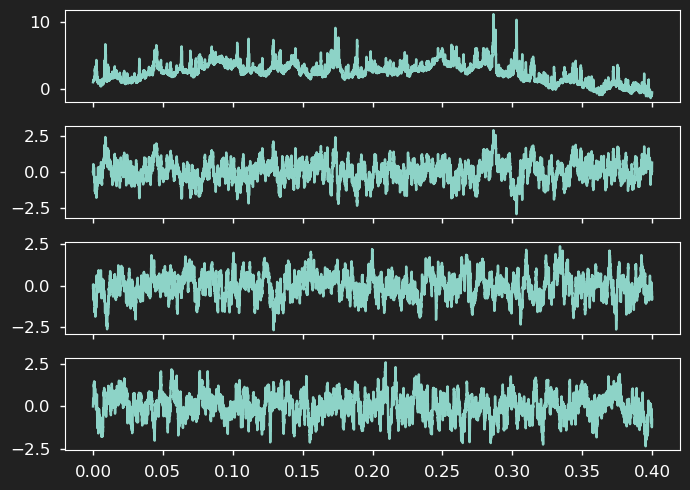

In [7]:
fig, axs = plt.subplots(nrows=len(path.T), sharex=True)
for p, ax in zip(path.T, axs):
    ax.plot(times, p)

fig.tight_layout()
plt.show(fig)
plt.close(fig)

In [8]:
colors = ['#8dd3c7', '#feffb3', '#fa8174']
cmap1 = mpl.colors.LinearSegmentedColormap.from_list("mycmap", colors)

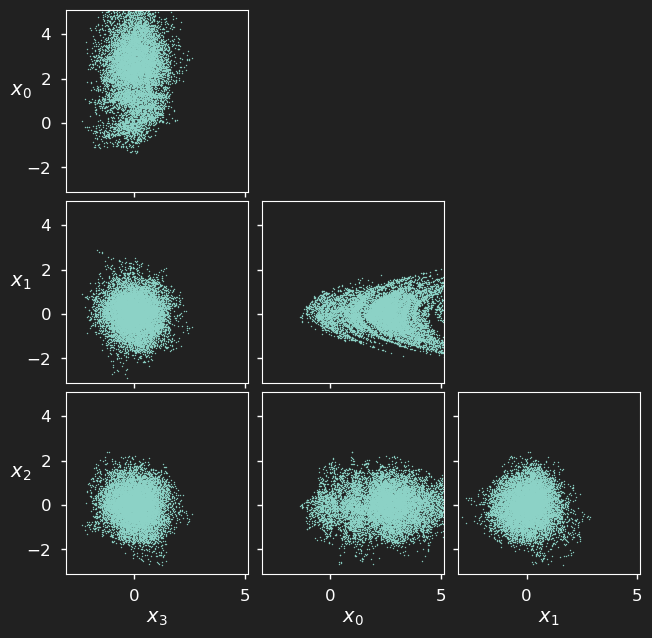

In [16]:
fig = plt.figure(figsize=(10,10))

gs = coord_grid(fig, path, xylim=[-3.1, 5.1])

plt.show(fig)
plt.close(fig)

## Training dataset

In [10]:
train_ds = dataset(root / 'data')
train_data = train_ds.data.numpy()

In [11]:
np.any(train_ds == np.nan)

False

In [12]:
len(train_ds.slow_proj)

2010

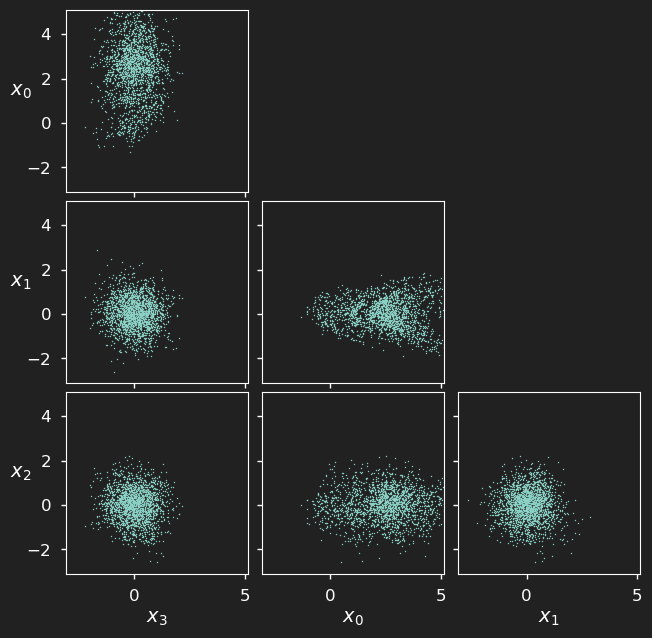

In [17]:
fig = plt.figure(figsize=(10,10))

gs = coord_grid(fig, train_data, xylim=[-3.1, 5.1])

plt.show(fig)
plt.close(fig)

## Timescale separation

In [18]:
covis = np.array([covi.detach().numpy() for dp, covi, proj in train_ds])
covis.shape

(2010, 4, 4)

In [21]:
data_evals, data_evecs = zip(*[np.linalg.eigh(covi) for covi in covis])  # zip(*...) is equiv to transposing :)
data_evals, data_evecs = np.array(data_evals), np.array(data_evecs)

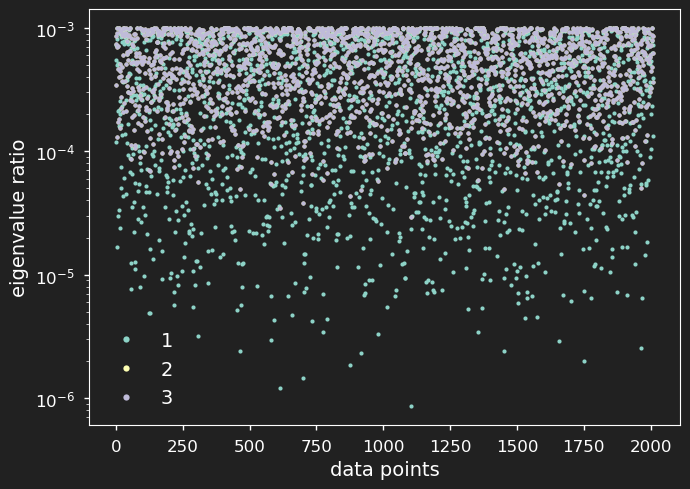

In [26]:
fig, ax = plt.subplots()
for n, e_val in enumerate(data_evals.T[:-1]):
    ax.plot(e_val/data_evals.T[-1], 'o', label=f"{n+1}")
ax.legend()
ax.set_yscale('log')

ax.set_xlabel('data points')
ax.set_ylabel('eigenvalue ratio')

fig.tight_layout()
plt.show(fig)
plt.close(fig)